#                   House Prices: Advanced Regression Techniques

***

** ID : AI-0003 **

** Submission Date : 7/05/2018 **

***

## Abstract

In this project, the aim is to predict the final price of each House With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. Purpose of this assignment is to improve the skills in Machine learning with real life problems. This problem is a good start to implement Nural Networks approach to Prediction, Data Preprocessing, Outliers Detection, Hyper Parameter Tuning and accuracy improvement. Below is the implementation of the problem with some explanation. Code is written in Python language.

### Approach

The approach used here consists of several segments such as Data Set Analysis, Data Preprocessing, Decision of Algorithm and Model. Visualization of Data Set, Data Correlation, Standardization, Feature Engineering and other Preprocessing is implemented to shape the Model for the prediction. Some basic data analysis like converting categorical features into numerical, filling all the missing values in train and test dataset is also done.

In this notebook total 5 attempts is made to solve the problem. Each time I achieved different (good or bad) score on kaggle. At first Neural network is examined to predict the House Price. After that, Convolutional Neural Network in keras with tensorflow backend is tried. Then XGBoost and Lasso model is examined. Finally blending is applied to predict the Sale Price of Houses. 


The lowest Root Mean Square Error (RMSE) score achieved on kaggle is 0.12037 using blending method.

## 1. Data Set Analysis

### Data loading and importing libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as scst
%matplotlib inline

from scipy.special import boxcox1p



C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Reading data from csv fil2e 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values survey

In this regression problem, there are lots of missing values in some columns. Below code checks for missing values in test and train data Set.

In [3]:
coloms = list(test)
for colom_name in coloms:
    if (train[colom_name].isnull().sum() >= 1 or test[colom_name].isnull().sum() >= 1 ):
        print(colom_name, train[colom_name].isnull().sum(),test[colom_name].isnull().sum())


MSZoning 0 4
LotFrontage 259 227
Alley 1369 1352
Utilities 0 2
Exterior1st 0 1
Exterior2nd 0 1
MasVnrType 8 16
MasVnrArea 8 15
BsmtQual 37 44
BsmtCond 37 45
BsmtExposure 38 44
BsmtFinType1 37 42
BsmtFinSF1 0 1
BsmtFinType2 38 42
BsmtFinSF2 0 1
BsmtUnfSF 0 1
TotalBsmtSF 0 1
Electrical 1 0
BsmtFullBath 0 2
BsmtHalfBath 0 2
KitchenQual 0 1
Functional 0 2
FireplaceQu 690 730
GarageType 81 76
GarageYrBlt 81 78
GarageFinish 81 78
GarageCars 0 1
GarageArea 0 1
GarageQual 81 78
GarageCond 81 78
PoolQC 1453 1456
Fence 1179 1169
MiscFeature 1406 1408
SaleType 0 1


From above listing it can be seen that some features like Alley, PoolQC, MiscFeature have more than 90% null values in both 
Train and Test set. This could be the meaning that these features may be not that important. Other features that have some missing values must be filled before modeling. There are also some coloms that contain almost same values, those are also considered as unimportant features. 

### Target Variable investigation

Sale Price is the target variable. Below code checks its behaviour like skewness, Mean value etc.

Mean: 180921.196
Standard Deviation: 79415.292


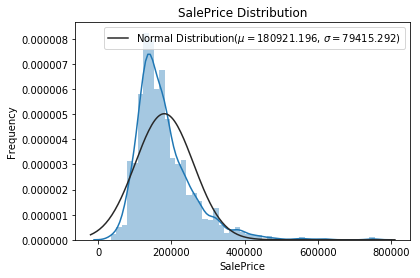

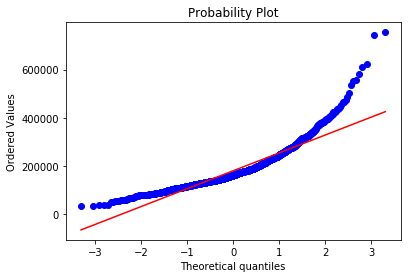

In [4]:
(mu, sigma) = scst.norm.fit(train['SalePrice'])
mu = round(mu,3)
sigma = round(sigma,3)

print('Mean:', mu)
print('Standard Deviation:', sigma)

plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

sb.distplot(train['SalePrice'] , fit=scst.norm) 
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)],loc='best')
plt.show()

scst.probplot(train['SalePrice'], plot=plt)
plt.show()



The Target Variable is right(positive) skewed. The Probability Plot also verifies the right skewness of Target Variable. 

### Correlation between features

Identify the Correlation between features is important part of the prediction process. Below code shows relation between features with the help of some visualisation techniques.

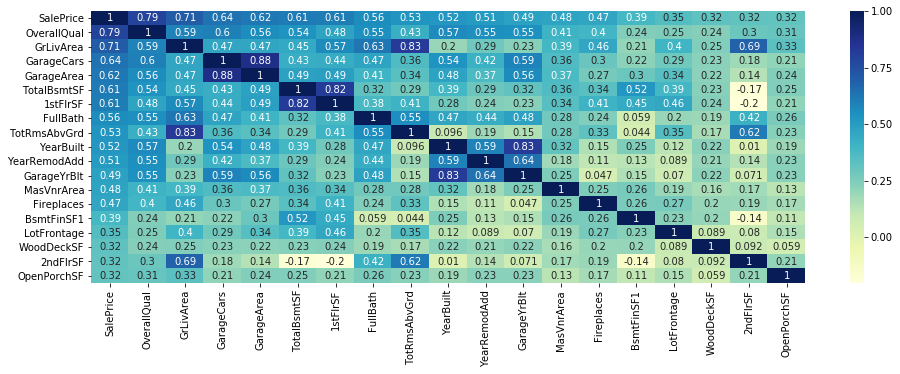

In [5]:
matrix = train.corr()
matrix.sort_values(['SalePrice'], ascending = False, inplace = True)
col_names = list(matrix.index[abs(matrix['SalePrice']) > 0.3 ])

plt.figure(figsize=(16,5))
sb.heatmap(train[col_names].corr(), annot=True,cmap="YlGnBu")
plt.show()

Heatmap shows the correlation with target variable with other features if greater than 0.3. From above figure it shows some Features have a high Correlation(>0.8) among themselves like 'GarageCars' and 'GarageArea'(0.88), 'GrLivArea' and 'TotRmsAbvGrd'(0.83) etc.

Correlation value can be both positive and negative where negative value means inverse correlation. If the correlation value is greater; the feature is important. Below listing shows wchich features has the correlation with Target variable greater than 0.6.



In [6]:
print(matrix['SalePrice'][abs(matrix['SalePrice']) > 0.6])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


'OverallQual' is highly correlated(0.79) with the Target Variable 'SalePrice'. Second most correlated feature is GrLivArea and these all have positive correlation. Relation between OverallQual and SalePrice is shown in the barplot below.

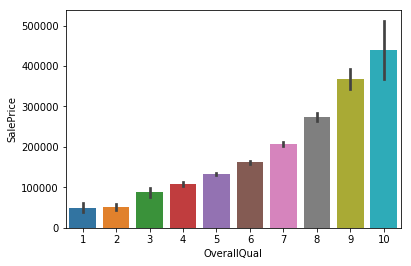

In [7]:
sb.barplot(train.OverallQual,train.SalePrice)
plt.show()

The next highly correlated features are plotted against the target variable below.

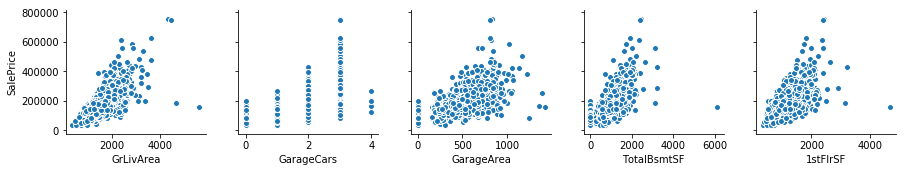

In [8]:
sb.pairplot(train,
                  y_vars=['SalePrice'],
                  x_vars=[ 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF'], size = 2.5)
plt.show()


Above figure shows how the most effective Features are correlated with the Target Variable.'GrLivArea', 'TotalBsmtSF' and '1stFlrSF'seem to be somewhat linearly related with 'SalePrice'. Information about Outliers are visible in these plots which can be explored next.


### Skewness of Numerical Features

It could be possible that other numerical features also have skewness as Target variable. Below code checks for the skewness of the numerical features in both Train and Test datasets.

In [9]:
data_col = train.dtypes[train.dtypes != 'object'].index 
data_col = data_col.drop('SalePrice')

skewness_train = train[data_col].apply(lambda x: x.skew())
skewness_test = test[data_col].apply(lambda x: x.skew())

print("Skewness of Numerical Features in Train Dataset:\n", skewness_train.sort_values(ascending=False).head(15))
print("\nSkewness of Numerical Features in Test Dataset:\n", skewness_test.sort_values(ascending=False).head(15))


Skewness of Numerical Features in Train Dataset:
 MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
dtype: float64

Skewness of Numerical Features in Test Dataset:
 PoolArea         20.196888
MiscVal          20.075188
LowQualFinSF     16.167254
3SsnPorch        12.524216
EnclosedPorch     4.669172
KitchenAbvGr      4.079055
BsmtFinSF2        4.041345
ScreenPorch       3.788244
BsmtHalfBath      3.779866
LotArea           3.115217
OpenPorchSF       2.687779
MasVnrArea        2.533377
WoodDeckSF        2.130760
1stFlrSF          1.558195
MSSubClass        1.346690
dtype: float64


From above listing it is clear that some numerical features are skewed. Skewed features must be normalized before modeling to 
achieve higher accuracy in SalePrice prediction. 

### Outlier Detection

Below graph shows the house Price against the living area square feet(GrLivarea). Data dencity can be clearly noticed from here.

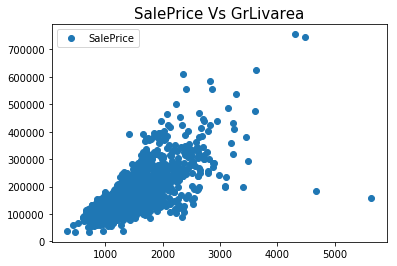

In [10]:
plt.plot(train['GrLivArea'], train['SalePrice'], 'o')
plt.title("SalePrice Vs GrLivarea", fontsize = 15)
plt.legend()
plt.show()

From above figure outliers are seen which must be removed before modeling.

### Data Analysis: count_value split

There are some features that contain almost same value. This can be seen using value_count split. Below some of
these features vale_count are shown among 1460 samples.

In [11]:
print(pd.value_counts(test['Utilities']))
print(pd.value_counts(test['Street']))
print(pd.value_counts(test['Condition2']))

AllPub    1457
Name: Utilities, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64


## 2. Data Preprocessing     

### Missing values Handling

Missing Values must be filled before modeling. Some analysis should be done before filling like what type(categorical/ numerical) of feature we are going to fill, appropriate value for that missing field etc. Missing values can be filled with mean value, mode value and 0/None value etc. Below code shows how missing values are filled here. 

In [12]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

train['MoSold'] = train['MoSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

# Filling with Mode value
col_mode = ['MSZoning', 'Exterior1st', 'Exterior2nd','Utilities','Electrical','KitchenQual','SaleType','Functional']

for name in col_mode:
    train[name] = train[name].fillna(train[name].mode()[0])
    test[name] = test[name].fillna(test[name].mode()[0])

#Filling with 'None' value

col_categorical = ['MSSubClass', 'Alley','MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                   'GarageCond', 'PoolQC','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSZoning',
                  'MasVnrType']


for name in col_categorical:
    train[name] = train[name].fillna('None')
    test[name] = test[name].fillna('None')

# Filling with 0 value
col_numerical = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                 'BsmtFullBath','BsmtHalfBath', 'MasVnrArea']

for name in col_numerical:
    train[name] = train[name].fillna(0)
    test[name] = test[name].fillna(0)

# Filling with Median
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


print('\nMissing Values in Train Set :', train.isnull().sum().sum())
print('Missing Values in Test Set :', test.isnull().sum().sum())




Missing Values in Train Set : 0
Missing Values in Test Set : 0


Based on data description some features like MSZoning, OverallCond, moSold converted to String because digits do not represent their true meaning. Some Missing values that is categorical feature is filled by 'None' because NA means that the sample lacks that Feature. Some Missing Values is filled by mode/0 value based on their nature. Filling with mode means filling them by the most frequent value; sample being categorized into one of the Feature Values. By filling numerical 0 means that sample lacks that feature. 

Missing Values in the 'LotFrontage' column is filled by the median of the same Neighborhood's LotFrontage since the area of 
each street connected to the house property most likely has a similar area to other houses in its Neighborhood. Missing Values is filled by the median of that group.


### Removing the Outliers

It is important to detect and remove the outlier from data. Without this noise will affect prediction. Here IsolationForest is used for removing the outliers.It is very simple but effective technique to detect outliers according to some kaggler's kernels.  Befor applying, some columns that have string values converted to integer values below.

In [13]:
obj = train.loc[:, train.dtypes == object] 
Str_cols = obj.columns.tolist()

for col in Str_cols:
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.codes
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.codes
 

In [14]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


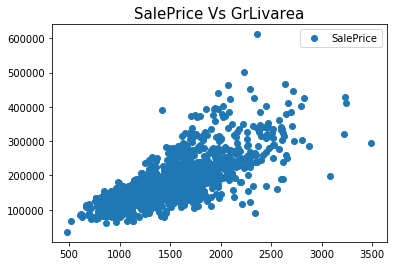

In [15]:
plt.plot(train['GrLivArea'],train['SalePrice'], 'o')
plt.title("SalePrice Vs GrLivarea", fontsize = 15)
plt.legend()
plt.show()

Above figure shows GRLivarea against SalePrice after removing the outliers. 146 rows are removed and we will work on 1314 samples without outliers.  

### Data Normalization

Log Transformation is applied to the Target Variable because of its high skewness.

In [16]:
Y = train["SalePrice"].values
y = np.log(Y)


Below code shows Target variable nature after log transformation.

Mean: 12.037
Standard Deviation: 0.358


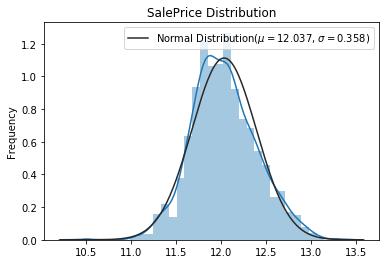

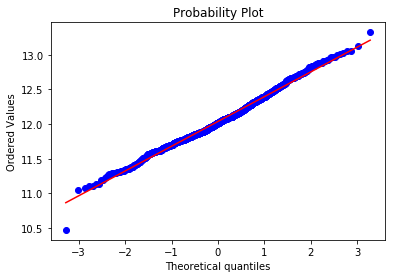

In [17]:
(mu, sigma) = scst.norm.fit(y)
mu = round(mu, 3)
sigma = round(sigma, 3)

print('Mean:', mu)
print('Standard Deviation:', sigma)

#Skewness of saleprice
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

sb.distplot(y, fit = scst.norm) 
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc = 'best')
plt.show()


scst.probplot(y, plot = plt)
plt.show()



Log transformation greatly reduced the Skewness of the Target Variable. The Kurtosis is also reduced. The Data now appears more Normally Distributed.
 

### Feature Engineering

Some feature engineering is done based on some trial and error experiment. Two new features are added below. 'Age' and 'TotalSF' are calculated from coresponding features.

In [18]:
train['Age'] = train.YrSold - train.YearBuilt  
test['Age'] = test.YrSold - test.YearBuilt

train["TotalSF"] = train["FullBath"] + train["TotalBsmtSF"] + (train["1stFlrSF"] + train["2ndFlrSF"])
test["TotalSF"] =test["FullBath"] + test["TotalBsmtSF"] + (test["1stFlrSF"] + test["2ndFlrSF"])


From Correlation analysis, It is clear that some features have very low correlation with Target variable. Features that have
correlation with target variable 'SalePrice' less than 0.30 are excluded from final feature list used to predict via ANN.

In [19]:
matrix = train.corr()
low_correlation_features = list(matrix.index[abs(matrix['SalePrice']) < 0.3])
print("Features that have correlation with Target variable less than 0.3:\n\n",low_correlation_features)

important_features = list(train.columns.values)
important_features = [x for x in important_features if x not in low_correlation_features] 

important_features.remove('SalePrice')
print("\n\nFeatures that will be used for prediction using ANN:\n\n",important_features)

Features that have correlation with Target variable less than 0.3:

 ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'FireplaceQu', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


Features that will be used for prediction using ANN:

 ['LotFrontage', 'LotArea', 'Utilities', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure'

In 'Data Set Analysis' section skewed features are examined. Skewed features can be normalized using scaling and as Neural Network will be used, it is better to scaling all features. Below code scales features using StandardScaler.

In [20]:
X = train[important_features]
Xtest = test[important_features]

scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)

test_x = scaler.transform(Xtest)


## 3. Selection of Model / Algorithm

In this project I have used Neural Network, Convolutional neural netwoek, XGBRegressor and Lasso Model for prediction. In this 
section all these are examined one by one to check which model gives better accuracy in SalePrice prediction.

### ANN

Below code is Neural Network model. Here model constructed with Grid Search Cross Validation. MLPRegressor is used as it is a regression problem. Three hidden layers are in the model. As it is regression problem last layer size is one. The Rule of thumb for node number selection is that the number of hidden nodes in each layer should be somewhere between the size of the input and output layer. So for first layer it is between feature size and last layer node number.For second layer node number is between the first layer and last layer node number and so on and Gridsearch is used for finding optimal hyper parameters. Ten fold cross validation and scoring function r2 is used.

In [21]:
feature_size = x.shape[1]
last_layer = 1
First_layer = (feature_size + last_layer) // 2
Second_layer = (First_layer + last_layer) // 2
Third_layer = (Second_layer + last_layer) // 2

Reg = MLPRegressor(hidden_layer_sizes = (First_layer, Second_layer, Third_layer), max_iter = 1000, verbose = False)

activation_options = ['logistic', 'tanh', 'relu']
solver_options = ['lbfgs', 'adam', 'sgd']
alpha_options = [0.001]
learning_rate_options = ['constant', 'adaptive']
tol_options = [0.0001]
param_grid_ = dict(activation = activation_options,
                       solver = solver_options,
                       alpha = alpha_options,
                       learning_rate = learning_rate_options,
                        tol = tol_options)

gridMLPReg = GridSearchCV(Reg, param_grid = param_grid_, cv = 10, scoring = 'r2')

gridMLPReg.fit(x,y)

C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maxi

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14, 7, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam', 'sgd'], 'alpha': [0.001], 'learning_rate': ['constant', 'adaptive'], 'tol': [0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [22]:
print('Best Score using ANN :', gridMLPReg.best_score_)
print('Best Parameters using ANN :', gridMLPReg.best_params_)


Best Score using ANN : 0.8586745446010253
Best Parameters using ANN : {'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'constant', 'solver': 'lbfgs', 'tol': 0.0001}


GridSearch finds the best parameters for this model. Below code stores the predicted result with their Id in a csv file which will be submitted in kaggle.  

In [23]:
y_pred = np.exp(gridMLPReg.predict(test_x))
print('Sale Price prediction using ANN \n\n', y_pred)

test_y_grid = pd.DataFrame()
test_y_grid['Id'] = test['Id']
test_y_grid['SalePrice'] = y_pred
test_y_grid.to_csv('submission_ann.csv', index = 0)

Sale Price prediction using ANN 

 [119370.3019364  156489.91529812 178199.51912237 ... 174097.55566568
 109777.99286267 230272.75326611]


From the above  architecture of MLPregressor gives the score of 0.14502 in Kaggle. 

### CNN

In this part convolutional neural network is examined. Keras is used with TensorFlow backend.


In [21]:
#Importing the libraries for keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Here, I use more features than ANN. Features that has the correlation with SalePrice more than 0.02 are used to check whether accuracy will be increased or not. Below code shows features that have correlation with target variable less than 0.02.

In [22]:
matrix = train.corr()
low_correlation_features = list(matrix.index[abs(matrix['SalePrice']) < 0.02])
low_correlation_features

['LandContour', 'Condition2', 'PoolArea', 'PoolQC', 'YrSold']

In [23]:
important_features = list(train.columns.values)
important_features = [x for x in important_features if x not in ['Id', 'SalePrice', 'Street', 'Alley', 'Utilities', 
                                                                 'LandContour', 'PoolArea', 'PoolQC', 'Condition2', 'YrSold']]
len(important_features)


73

Low correlation features are excluded from features that will be used to predict result. Features like Alley has highest missing values so is also excluded. 'Utilities','Street' are excluded because of their imbalanced count_value split. 

Data preprocessing is done below for CNN. MinMaxScaler is used to scaling the features.

In [24]:
X1 = train[important_features]
Xtest1 = test[important_features]

mat_train = np.matrix(X1)
mat_test  = np.matrix(Xtest1)
mat_y = np.array(Y).reshape((1314, 1))

minmax_scaler_y = MinMaxScaler()
minmax_scaler_y.fit(mat_y)
Y_cnn = minmax_scaler_y.transform(mat_y)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(mat_train)

X_cnn = minmax_scaler.transform(mat_train)
Xtest_cnn = minmax_scaler.transform(mat_test)


C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Various combinations of Layers were attempted and below is the best attempted model. Number of layers, Number of nodes on each Layer is tuned according to trial and error process. Other optimizers also tried. Adadelta did not give good result. Adam is used as it gives better result.

In [25]:
from keras import optimizers

nb_epochs = 1100

modelFinal = Sequential()
# Stack of Layers

modelFinal.add(Dense(units=200, activation='relu', input_dim=73))
modelFinal.add(Dense(units=100, activation='relu'))

modelFinal.add(Dense(units=50, activation='relu'))
modelFinal.add(Dense(units=25, activation='relu'))

modelFinal.add(Dense(units=1))

modelFinal.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               14800     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 41,251
Trainable params: 41,251
Non-trainable params: 0
_________________________________________________________________


In [26]:
modelFinal.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.adam())

modelFinal.fit(np.array(X_cnn), np.array(Y_cnn), epochs = nb_epochs, validation_split = 0.2, verbose = 1, batch_size = 25)


Train on 1051 samples, validate on 263 samples
Epoch 1/1100
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0121 - val_loss: 0.0029
Epoch 2/1100
1051/1051 [==============================] - 0s 118us/step - loss: 0.0023 - val_loss: 0.0018
Epoch 3/1100
1051/1051 [==============================] - 0s 130us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/1100
1051/1051 [==============================] - 0s 120us/step - loss: 0.0020 - val_loss: 0.0036
Epoch 5/1100
1051/1051 [==============================] - 0s 133us/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/1100
1051/1051 [==============================] - 0s 130us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/1100
1051/1051 [==============================] - 0s 114us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/1100
1051/1051 [==============================] - 0s 120us/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/1100
1051/1051 [==============================] - 0s 122us/step - loss: 0.0013 - val_loss: 0.0014
E

1051/1051 [==============================] - 0s 159us/step - loss: 3.8941e-04 - val_loss: 0.0016
Epoch 76/1100
1051/1051 [==============================] - 0s 130us/step - loss: 3.8823e-04 - val_loss: 0.0019
Epoch 77/1100
1051/1051 [==============================] - 0s 129us/step - loss: 0.0015 - val_loss: 0.0033
Epoch 78/1100
1051/1051 [==============================] - 0s 118us/step - loss: 8.7410e-04 - val_loss: 0.0021
Epoch 79/1100
1051/1051 [==============================] - 0s 143us/step - loss: 4.4645e-04 - val_loss: 0.0017
Epoch 80/1100
1051/1051 [==============================] - 0s 114us/step - loss: 4.4588e-04 - val_loss: 0.0015
Epoch 81/1100
1051/1051 [==============================] - 0s 114us/step - loss: 4.8513e-04 - val_loss: 0.0017
Epoch 82/1100
1051/1051 [==============================] - 0s 126us/step - loss: 3.4030e-04 - val_loss: 0.0017
Epoch 83/1100
1051/1051 [==============================] - 0s 143us/step - loss: 4.8179e-04 - val_loss: 0.0021
Epoch 84/1100
1051/

1051/1051 [==============================] - 0s 140us/step - loss: 2.3762e-04 - val_loss: 0.0017
Epoch 149/1100
1051/1051 [==============================] - 0s 129us/step - loss: 2.1928e-04 - val_loss: 0.0017
Epoch 150/1100
1051/1051 [==============================] - 0s 120us/step - loss: 1.8450e-04 - val_loss: 0.0017
Epoch 151/1100
1051/1051 [==============================] - 0s 124us/step - loss: 5.7359e-04 - val_loss: 0.0017
Epoch 152/1100
1051/1051 [==============================] - 0s 119us/step - loss: 2.7649e-04 - val_loss: 0.0016
Epoch 153/1100
1051/1051 [==============================] - 0s 118us/step - loss: 1.5950e-04 - val_loss: 0.0015
Epoch 154/1100
1051/1051 [==============================] - 0s 138us/step - loss: 1.1115e-04 - val_loss: 0.0016
Epoch 155/1100
1051/1051 [==============================] - 0s 130us/step - loss: 1.1706e-04 - val_loss: 0.0016
Epoch 156/1100
1051/1051 [==============================] - 0s 148us/step - loss: 8.1177e-05 - val_loss: 0.0018
Epoch 1

1051/1051 [==============================] - 0s 131us/step - loss: 2.8736e-04 - val_loss: 0.0016
Epoch 222/1100
1051/1051 [==============================] - 0s 108us/step - loss: 2.1395e-04 - val_loss: 0.0018
Epoch 223/1100
1051/1051 [==============================] - 0s 107us/step - loss: 2.4439e-04 - val_loss: 0.0016
Epoch 224/1100
1051/1051 [==============================] - 0s 104us/step - loss: 1.3706e-04 - val_loss: 0.0016
Epoch 225/1100
1051/1051 [==============================] - 0s 106us/step - loss: 1.1854e-04 - val_loss: 0.0016
Epoch 226/1100
1051/1051 [==============================] - 0s 106us/step - loss: 9.8699e-05 - val_loss: 0.0016
Epoch 227/1100
1051/1051 [==============================] - 0s 116us/step - loss: 9.8583e-05 - val_loss: 0.0016
Epoch 228/1100
1051/1051 [==============================] - 0s 117us/step - loss: 1.2110e-04 - val_loss: 0.0016
Epoch 229/1100
1051/1051 [==============================] - 0s 113us/step - loss: 1.1025e-04 - val_loss: 0.0016
Epoch 2

1051/1051 [==============================] - 0s 126us/step - loss: 1.1397e-04 - val_loss: 0.0019
Epoch 295/1100
1051/1051 [==============================] - 0s 107us/step - loss: 1.4514e-04 - val_loss: 0.0019
Epoch 296/1100
1051/1051 [==============================] - 0s 108us/step - loss: 1.1043e-04 - val_loss: 0.0017
Epoch 297/1100
1051/1051 [==============================] - 0s 110us/step - loss: 7.9015e-05 - val_loss: 0.0017
Epoch 298/1100
1051/1051 [==============================] - 0s 105us/step - loss: 7.8478e-05 - val_loss: 0.0017
Epoch 299/1100
1051/1051 [==============================] - 0s 107us/step - loss: 8.9570e-05 - val_loss: 0.0017
Epoch 300/1100
1051/1051 [==============================] - 0s 121us/step - loss: 7.8010e-05 - val_loss: 0.0017
Epoch 301/1100
1051/1051 [==============================] - 0s 107us/step - loss: 8.8565e-05 - val_loss: 0.0018
Epoch 302/1100
1051/1051 [==============================] - 0s 107us/step - loss: 6.7300e-05 - val_loss: 0.0017
Epoch 3

1051/1051 [==============================] - 0s 106us/step - loss: 3.3244e-05 - val_loss: 0.0017
Epoch 368/1100
1051/1051 [==============================] - 0s 109us/step - loss: 3.1150e-05 - val_loss: 0.0019
Epoch 369/1100
1051/1051 [==============================] - 0s 115us/step - loss: 5.3752e-05 - val_loss: 0.0017
Epoch 370/1100
1051/1051 [==============================] - 0s 104us/step - loss: 7.3697e-05 - val_loss: 0.0016
Epoch 371/1100
1051/1051 [==============================] - 0s 100us/step - loss: 4.8126e-05 - val_loss: 0.0018
Epoch 372/1100
1051/1051 [==============================] - 0s 128us/step - loss: 4.0603e-05 - val_loss: 0.0018
Epoch 373/1100
1051/1051 [==============================] - 0s 150us/step - loss: 3.7474e-05 - val_loss: 0.0017
Epoch 374/1100
1051/1051 [==============================] - 0s 129us/step - loss: 3.3850e-05 - val_loss: 0.0018
Epoch 375/1100
1051/1051 [==============================] - 0s 98us/step - loss: 5.4313e-05 - val_loss: 0.0017
Epoch 37

1051/1051 [==============================] - 0s 119us/step - loss: 3.9860e-05 - val_loss: 0.0016
Epoch 441/1100
1051/1051 [==============================] - 0s 102us/step - loss: 3.9360e-05 - val_loss: 0.0016
Epoch 442/1100
1051/1051 [==============================] - 0s 113us/step - loss: 3.5629e-05 - val_loss: 0.0017
Epoch 443/1100
1051/1051 [==============================] - 0s 147us/step - loss: 3.4761e-05 - val_loss: 0.0017
Epoch 444/1100
1051/1051 [==============================] - 0s 142us/step - loss: 3.7643e-05 - val_loss: 0.0015
Epoch 445/1100
1051/1051 [==============================] - 0s 145us/step - loss: 3.2562e-05 - val_loss: 0.0016
Epoch 446/1100
1051/1051 [==============================] - 0s 132us/step - loss: 5.4873e-05 - val_loss: 0.0015
Epoch 447/1100
1051/1051 [==============================] - 0s 185us/step - loss: 2.2406e-04 - val_loss: 0.0017
Epoch 448/1100
1051/1051 [==============================] - 0s 209us/step - loss: 3.1256e-04 - val_loss: 0.0016
Epoch 4

1051/1051 [==============================] - 0s 130us/step - loss: 1.1356e-04 - val_loss: 0.0017
Epoch 514/1100
1051/1051 [==============================] - 0s 126us/step - loss: 5.5292e-05 - val_loss: 0.0015
Epoch 515/1100
1051/1051 [==============================] - 0s 127us/step - loss: 7.9787e-05 - val_loss: 0.0016
Epoch 516/1100
1051/1051 [==============================] - 0s 132us/step - loss: 5.1282e-05 - val_loss: 0.0017
Epoch 517/1100
1051/1051 [==============================] - 0s 138us/step - loss: 4.5469e-05 - val_loss: 0.0019
Epoch 518/1100
1051/1051 [==============================] - 0s 127us/step - loss: 0.0013 - val_loss: 0.0018
Epoch 519/1100
1051/1051 [==============================] - 0s 137us/step - loss: 5.3995e-04 - val_loss: 0.0019
Epoch 520/1100
1051/1051 [==============================] - 0s 127us/step - loss: 2.9252e-04 - val_loss: 0.0017
Epoch 521/1100
1051/1051 [==============================] - 0s 128us/step - loss: 1.6756e-04 - val_loss: 0.0018
Epoch 522/1

1051/1051 [==============================] - 0s 136us/step - loss: 2.7853e-05 - val_loss: 0.0015
Epoch 587/1100
1051/1051 [==============================] - 0s 147us/step - loss: 2.3327e-05 - val_loss: 0.0016
Epoch 588/1100
1051/1051 [==============================] - 0s 152us/step - loss: 1.3870e-05 - val_loss: 0.0015
Epoch 589/1100
1051/1051 [==============================] - 0s 165us/step - loss: 1.3727e-05 - val_loss: 0.0017
Epoch 590/1100
1051/1051 [==============================] - 0s 139us/step - loss: 1.8365e-05 - val_loss: 0.0015
Epoch 591/1100
1051/1051 [==============================] - 0s 158us/step - loss: 4.3322e-05 - val_loss: 0.0015
Epoch 592/1100
1051/1051 [==============================] - 0s 150us/step - loss: 4.9172e-05 - val_loss: 0.0017
Epoch 593/1100
1051/1051 [==============================] - 0s 141us/step - loss: 3.3997e-05 - val_loss: 0.0015
Epoch 594/1100
1051/1051 [==============================] - 0s 138us/step - loss: 3.8879e-05 - val_loss: 0.0016
Epoch 5

1051/1051 [==============================] - 0s 128us/step - loss: 6.4152e-06 - val_loss: 0.0015
Epoch 660/1100
1051/1051 [==============================] - 0s 113us/step - loss: 6.8616e-06 - val_loss: 0.0015
Epoch 661/1100
1051/1051 [==============================] - 0s 119us/step - loss: 6.2147e-06 - val_loss: 0.0015
Epoch 662/1100
1051/1051 [==============================] - 0s 118us/step - loss: 9.2531e-06 - val_loss: 0.0016
Epoch 663/1100
1051/1051 [==============================] - 0s 122us/step - loss: 1.3346e-04 - val_loss: 0.0015
Epoch 664/1100
1051/1051 [==============================] - 0s 138us/step - loss: 1.5601e-04 - val_loss: 0.0016
Epoch 665/1100
1051/1051 [==============================] - 0s 146us/step - loss: 1.3261e-04 - val_loss: 0.0016
Epoch 666/1100
1051/1051 [==============================] - 0s 138us/step - loss: 1.1058e-04 - val_loss: 0.0016
Epoch 667/1100
1051/1051 [==============================] - 0s 140us/step - loss: 3.7110e-05 - val_loss: 0.0015
Epoch 6

1051/1051 [==============================] - 0s 97us/step - loss: 3.1520e-05 - val_loss: 0.0015
Epoch 733/1100
1051/1051 [==============================] - 0s 96us/step - loss: 9.7537e-06 - val_loss: 0.0015
Epoch 734/1100
1051/1051 [==============================] - 0s 96us/step - loss: 9.2971e-06 - val_loss: 0.0015
Epoch 735/1100
1051/1051 [==============================] - 0s 95us/step - loss: 2.0326e-05 - val_loss: 0.0016
Epoch 736/1100
1051/1051 [==============================] - 0s 98us/step - loss: 1.7336e-05 - val_loss: 0.0017
Epoch 737/1100
1051/1051 [==============================] - 0s 93us/step - loss: 1.6992e-05 - val_loss: 0.0015
Epoch 738/1100
1051/1051 [==============================] - 0s 94us/step - loss: 1.1734e-05 - val_loss: 0.0015
Epoch 739/1100
1051/1051 [==============================] - 0s 100us/step - loss: 2.4197e-05 - val_loss: 0.0015
Epoch 740/1100
1051/1051 [==============================] - 0s 103us/step - loss: 5.6030e-05 - val_loss: 0.0016
Epoch 741/1100

1051/1051 [==============================] - 0s 126us/step - loss: 7.1540e-06 - val_loss: 0.0015
Epoch 806/1100
1051/1051 [==============================] - 0s 106us/step - loss: 1.1157e-05 - val_loss: 0.0015
Epoch 807/1100
1051/1051 [==============================] - 0s 102us/step - loss: 1.4027e-05 - val_loss: 0.0015
Epoch 808/1100
1051/1051 [==============================] - 0s 106us/step - loss: 8.3908e-06 - val_loss: 0.0015
Epoch 809/1100
1051/1051 [==============================] - 0s 107us/step - loss: 8.4008e-06 - val_loss: 0.0015
Epoch 810/1100
1051/1051 [==============================] - 0s 103us/step - loss: 1.0998e-05 - val_loss: 0.0015
Epoch 811/1100
1051/1051 [==============================] - 0s 120us/step - loss: 1.6774e-05 - val_loss: 0.0015
Epoch 812/1100
1051/1051 [==============================] - 0s 107us/step - loss: 7.1447e-06 - val_loss: 0.0015
Epoch 813/1100
1051/1051 [==============================] - 0s 104us/step - loss: 5.9162e-06 - val_loss: 0.0015
Epoch 8

1051/1051 [==============================] - 0s 133us/step - loss: 1.4699e-05 - val_loss: 0.0015
Epoch 879/1100
1051/1051 [==============================] - 0s 103us/step - loss: 1.4582e-05 - val_loss: 0.0015
Epoch 880/1100
1051/1051 [==============================] - 0s 99us/step - loss: 1.6553e-05 - val_loss: 0.0015
Epoch 881/1100
1051/1051 [==============================] - 0s 104us/step - loss: 4.3515e-05 - val_loss: 0.0015
Epoch 882/1100
1051/1051 [==============================] - 0s 105us/step - loss: 2.7908e-05 - val_loss: 0.0015
Epoch 883/1100
1051/1051 [==============================] - 0s 119us/step - loss: 2.7045e-05 - val_loss: 0.0016
Epoch 884/1100
1051/1051 [==============================] - 0s 126us/step - loss: 2.5270e-05 - val_loss: 0.0015
Epoch 885/1100
1051/1051 [==============================] - 0s 127us/step - loss: 3.2054e-05 - val_loss: 0.0015
Epoch 886/1100
1051/1051 [==============================] - 0s 103us/step - loss: 2.2909e-05 - val_loss: 0.0015
Epoch 88

1051/1051 [==============================] - 0s 126us/step - loss: 3.8279e-05 - val_loss: 0.0014
Epoch 952/1100
1051/1051 [==============================] - 0s 103us/step - loss: 1.3358e-05 - val_loss: 0.0015
Epoch 953/1100
1051/1051 [==============================] - 0s 102us/step - loss: 1.2944e-05 - val_loss: 0.0014
Epoch 954/1100
1051/1051 [==============================] - 0s 103us/step - loss: 6.8261e-06 - val_loss: 0.0014
Epoch 955/1100
1051/1051 [==============================] - 0s 106us/step - loss: 4.7431e-06 - val_loss: 0.0014
Epoch 956/1100
1051/1051 [==============================] - 0s 102us/step - loss: 4.1312e-06 - val_loss: 0.0015
Epoch 957/1100
1051/1051 [==============================] - 0s 108us/step - loss: 3.6882e-06 - val_loss: 0.0014
Epoch 958/1100
1051/1051 [==============================] - 0s 102us/step - loss: 3.0207e-06 - val_loss: 0.0014
Epoch 959/1100
1051/1051 [==============================] - 0s 114us/step - loss: 1.2227e-05 - val_loss: 0.0015
Epoch 9

1051/1051 [==============================] - 0s 130us/step - loss: 1.0313e-05 - val_loss: 0.0014
Epoch 1025/1100
1051/1051 [==============================] - 0s 106us/step - loss: 6.4016e-06 - val_loss: 0.0014
Epoch 1026/1100
1051/1051 [==============================] - 0s 102us/step - loss: 6.3579e-06 - val_loss: 0.0014
Epoch 1027/1100
1051/1051 [==============================] - 0s 102us/step - loss: 1.0330e-05 - val_loss: 0.0014
Epoch 1028/1100
1051/1051 [==============================] - 0s 103us/step - loss: 1.4308e-05 - val_loss: 0.0014
Epoch 1029/1100
1051/1051 [==============================] - 0s 105us/step - loss: 1.5076e-05 - val_loss: 0.0015
Epoch 1030/1100
1051/1051 [==============================] - 0s 102us/step - loss: 9.7890e-06 - val_loss: 0.0014
Epoch 1031/1100
1051/1051 [==============================] - 0s 101us/step - loss: 8.0540e-06 - val_loss: 0.0015
Epoch 1032/1100
1051/1051 [==============================] - 0s 104us/step - loss: 1.6541e-05 - val_loss: 0.0016

1051/1051 [==============================] - 0s 129us/step - loss: 4.6476e-06 - val_loss: 0.0014
Epoch 1097/1100
1051/1051 [==============================] - 0s 102us/step - loss: 3.4344e-06 - val_loss: 0.0014
Epoch 1098/1100
1051/1051 [==============================] - 0s 102us/step - loss: 2.3094e-06 - val_loss: 0.0014
Epoch 1099/1100
1051/1051 [==============================] - 0s 102us/step - loss: 1.9624e-06 - val_loss: 0.0014
Epoch 1100/1100
1051/1051 [==============================] - 0s 110us/step - loss: 2.5078e-06 - val_loss: 0.0016


This model predict the result below and then prepare the data for submission.

In [27]:
y_predict = modelFinal.predict(np.array(Xtest_cnn))
y_pred_cnn = minmax_scaler_y.inverse_transform(np.array(y_predict).reshape(len(y_predict), 1))
print('Sale Price prediction using CNN \n\n', y_pred_cnn)

test_y_cnn = pd.DataFrame()
test_y_cnn['Id'] = test['Id']
test_y_cnn['SalePrice'] = y_pred_cnn
test_y_cnn.to_csv('submission_cnn.csv', index = 0)

Sale Price prediction using CNN 

 [[125807.12]
 [173857.78]
 [189995.1 ]
 ...
 [169721.47]
 [138893.17]
 [244773.9 ]]


The model gives 0.14658 score in kaggle which is not so good. So we will try furthur to improve the result.

### XGBoost

XGBoost models dominate many Kaggle competitions. So here, Hyperparameter tuning with XGBoost is done by grid search method to 
examine if the result is improved. Below code imports libraries for XGBoost and defines required functions.

In [31]:
def rmse(y_pred, y_true): 
    """
    Compute the Root Mean Squared Log Error for hypthesis y_pred and targets y_true
        y_pred - numpy array containing predictions with shape (n_samples, n_targets)
        y_true - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

#importing libraries 

import xgboost as xgb
from xgboost.sklearn import XGBRegressor


XGBRegressor is used below as it is a regression problem. Here, grid search is used to determine the best parameters. After Lots of trial process below is the best model found. Here, XGBRegressor's parameters options are selected by some trial and error process. Mainly default value for each parameters are tried with some varience. Features that I used for CNN used here with scaling.

In [32]:
scaler = StandardScaler()
scaler.fit(X1)
x = scaler.transform(X1)
test_x = scaler.transform(Xtest1)

In [33]:
xgb_model = XGBRegressor(silent=False)

subsample_options = [0.2, 0.5]
colsample_bytree_options = [0.2, 0.5] 
n_estimators_options = [3500, 7500] 
reg_lambda_options = [0.3] 
min_child_options = [1.2, 1.5]
param_dict = dict( reg_lambda = reg_lambda_options,
                      min_child_weight = min_child_options,
                        n_estimators = n_estimators_options,
                          subsample = subsample_options,
                              colsample_bytree = colsample_bytree_options )

best_clf = GridSearchCV(xgb_model, param_grid = param_dict, cv = 10, scoring = 'r2', verbose = 2)
best_clf.fit(x,y)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.7s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.2, n_estimators=35

[CV]  colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.2s
[CV] colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.2s
[CV] colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.2, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   6.0s
[CV] colsample_bytree=0.2, min_child_weight=1.5, n_estimators=35

[CV]  colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.6s
[CV] colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   9.0s
[CV] colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.7s
[CV] colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.4s
[CV] colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.2, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.6s
[CV] colsample_bytree=0.5, min_child_weight=1.2, n_estimators=35

[CV]  colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.4s
[CV] colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.6s
[CV] colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.5s
[CV] colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.5s
[CV] colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 
[CV]  colsample_bytree=0.5, min_child_weight=1.5, n_estimators=3500, reg_lambda=0.3, subsample=0.2 -   8.4s
[CV] colsample_bytree=0.5, min_child_weight=1.5, n_estimators=35

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 33.8min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'reg_lambda': [0.3], 'min_child_weight': [1.2, 1.5], 'n_estimators': [3500, 7500], 'subsample': [0.2, 0.5], 'colsample_bytree': [0.2, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=2)

In [34]:
print('Best Score using XGBRegressor:', best_clf.best_score_)
print('Best Parameters using XGBRegressor:', best_clf.best_params_)

Best Score using XGBRegressor: 0.9070907888343023
Best Parameters using XGBRegressor: {'colsample_bytree': 0.2, 'min_child_weight': 1.2, 'n_estimators': 3500, 'reg_lambda': 0.3, 'subsample': 0.5}


Prediction for this regressor is done below and then the data is prepared for submission.

In [35]:
y_pred_xgb = best_clf.predict(test_x)
y_pred = np.exp(y_pred_xgb)
print('Sale Price prediction using XGBRegressor \n\n', y_pred)

test_y_xgb = pd.DataFrame()
test_y_xgb['Id'] = test['Id']
test_y_xgb['SalePrice'] = y_pred
test_y_xgb.to_csv('submission_xgb.csv', index = 0)

Sale Price prediction using XGBRegressor 

 [138661.02 170580.84 199047.48 ... 158277.34 122563.42 222575.08]


This model gives 0.12748 score in kaggle. Next lasso is examined and tuned to check its preformance.

### Lasso Model

Here Lasso is examined. For parameter tuning grid search is used here also.

In [36]:
from sklearn.linear_model import Lasso

LR = Lasso()
lasso_param_grid = {
                "alpha":[0.0001,0.00099,0.00001],
                 "max_iter":[1000,1000000,50000],
                 }

lasso_model = GridSearchCV( LR, param_grid = lasso_param_grid, cv = 5, verbose = 2)

lasso_model.fit(x,y)




Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=0.0001, max_iter=1000 .....................................


C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............................ alpha=0.0001, max_iter=1000 -   0.1s
[CV] alpha=0.0001, max_iter=1000 .....................................
[CV] ............................ alpha=0.0001, max_iter=1000 -   0.0s
[CV] alpha=0.0001, max_iter=1000 .....................................


C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............................ alpha=0.0001, max_iter=1000 -   0.0s
[CV] alpha=0.0001, max_iter=1000 .....................................
[CV] ............................ alpha=0.0001, max_iter=1000 -   0.0s
[CV] alpha=0.0001, max_iter=1000 .....................................
[CV] ............................ alpha=0.0001, max_iter=1000 -   0.0s
[CV] alpha=0.0001, max_iter=1000000 ..................................
[CV] ......................... alpha=0.0001, max_iter=1000000 -   0.1s
[CV] alpha=0.0001, max_iter=1000000 ..................................
[CV] ......................... alpha=0.0001, max_iter=1000000 -   0.2s
[CV] alpha=0.0001, max_iter=1000000 ..................................
[CV] ......................... alpha=0.0001, max_iter=1000000 -   0.2s
[CV] alpha=0.0001, max_iter=1000000 ..................................
[CV] ......................... alpha=0.0001, max_iter=1000000 -   0.1s
[CV] alpha=0.0001, max_iter=1000000 ..................................
[CV] .

C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............................. alpha=1e-05, max_iter=1000 -   0.0s
[CV] alpha=1e-05, max_iter=1000 ......................................
[CV] ............................. alpha=1e-05, max_iter=1000 -   0.0s
[CV] alpha=1e-05, max_iter=1000 ......................................
[CV] ............................. alpha=1e-05, max_iter=1000 -   0.0s
[CV] alpha=1e-05, max_iter=1000 ......................................


C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\heera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............................. alpha=1e-05, max_iter=1000 -   0.0s
[CV] alpha=1e-05, max_iter=1000000 ...................................
[CV] .......................... alpha=1e-05, max_iter=1000000 -   2.7s
[CV] alpha=1e-05, max_iter=1000000 ...................................
[CV] .......................... alpha=1e-05, max_iter=1000000 -   2.6s
[CV] alpha=1e-05, max_iter=1000000 ...................................
[CV] .......................... alpha=1e-05, max_iter=1000000 -   2.8s
[CV] alpha=1e-05, max_iter=1000000 ...................................
[CV] .......................... alpha=1e-05, max_iter=1000000 -   2.6s
[CV] alpha=1e-05, max_iter=1000000 ...................................
[CV] .......................... alpha=1e-05, max_iter=1000000 -   2.2s
[CV] alpha=1e-05, max_iter=50000 .....................................
[CV] ............................ alpha=1e-05, max_iter=50000 -   2.7s
[CV] alpha=1e-05, max_iter=50000 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   30.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.00099, 1e-05], 'max_iter': [1000, 1000000, 50000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [37]:
print('Best Score using Lasso Model :', lasso_model.best_score_)
print('\nBest Parameters using Lasso Model :\n', lasso_model.best_estimator_)

Best Score using Lasso Model : 0.9061441437042977

Best Parameters using Lasso Model :
 Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


So, best perameter for alpha and max_iter are found. Now prediction will be done.

In [38]:
y_pred_lasso = lasso_model.predict(test_x)
y_pred = np.exp(y_pred_lasso)
print('Sale Price prediction using Lasso Model\n\n', y_pred)

test_y_lasso = pd.DataFrame()
test_y_lasso['Id'] = test['Id']
test_y_lasso['SalePrice'] = y_pred
test_y_lasso.to_csv('submission_lasso.csv', index = 0)

Sale Price prediction using Lasso Model

 [124354.60806189 159314.7390002  175305.57959853 ... 165347.63427645
 117011.4977231  221511.32852861]


This model gives 0.12665 score in kaggle. 

### Blending Method

To improve score many kaggalers use ensambling, stacking methods. Here I use blending method by avaraging results found from 
above two models.

In [39]:
y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)

test_y_combined = pd.DataFrame()
test_y_combined['Id'] = test['Id']
test_y_combined['SalePrice'] = y_pred
test_y_combined.to_csv('submission_combined.csv', index = 0)


This blending technique gives the best score 0.12037 in kaggle which is top 18% among other kagglers.

### Sample Output & kaggle Screen shot

In [40]:
result = pd.read_csv('submission_combined.csv')

print('\nSample Output(15 Predictions):\n')
result.head(10)


Sample Output(15 Predictions):



,Id,SalePrice
0,1461,131313.122014
1,1462,164851.579563
2,1463,186799.720117
3,1464,196981.920610
4,1465,183659.002738
5,1466,170154.646472
6,1467,179133.247805
7,1468,167517.662017
8,1469,178774.533230
9,1470,121154.098347


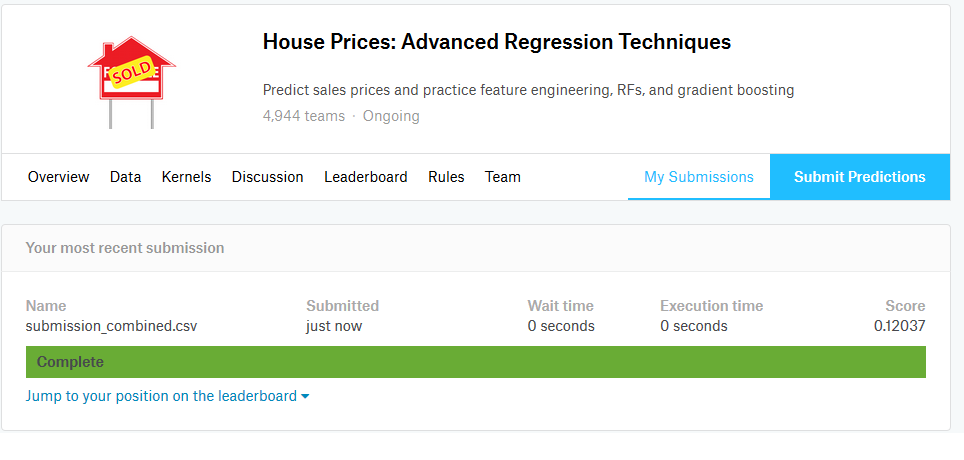

In [41]:
from IPython.display import Image
Image('Best_kaggle_score.PNG')

## Conclusion

Feature Engineering, Outlier Removal, Hyper Parameter Tuning have great impact on the improvement of the Final result. Moreover,
Neural Network has no real theory that explains how to choose Hidden Layers except the Thumb Rule and Trial & Error procedure.
It takes a lot of time when the Input Data is large and difficult to interpret and measure the impact of individual predictors. 
For improvement more feature engineering can be done by creating new features, using PCA, factorization etc. Using Deep Neural 
Network(DNN) may improve the result. At the top of that for better result Emsembling, Stacking could be used according to some 
kagglers.

At last, It can be said that this assignment helped me to understand regression problem and the challenges to face in this 
types of problems. 
